# Feature Selection

This article is on the concepts of feature reduction as well as the methods that can be used for selection, filtering, and cleaning the data as you prep it for your machine learning pipe line.


What the heck is feature selection?

Thats a great question! Imagine that you have dataset on the city traffic patterns and you want to predict how best to time the lights for any given situation. This dataset has everything frome the lanes on the road, to the type of tire on every car that drives in the city and everything inbetween. You have thousands of potential factors and training you facy new traffic prediction system would take more computation power than google and facebook combine. This leads you to the choice of giving up or reducing the number of features in the dataset. But how you do you choose which ones to keep? Thats where feature selection comes in to save the day. There are multiple ways of to go about it, but this post will focus on embedded methods, filter methods, and finally wrapper methods.

# Embedded Methods

Embedded methods are the most complex of the three. These methods are the process of building and testing your model on a small subset of features. At the same time they are those model are also selecting the most influental features at the same time. 

Embedded models have some key advantages:

- They can select the most effect features for the specific problem, while also being able to handle issues like multivariate relationships.

- They can be pretty cheap in terms of computational resources because of how they select features *while* training

The examples that are covered below are



## Regularization

## Decision treees

# Filter methods

The simplest type, filter methods *filter* out features prior to the training of the model. These are offen not automated liked the other methods but can work for any model you can think of.

Advantages of Filter Methods:
- They work on any method since they are done before fitting the data to the model
- These methods don't require much computation and can be done without powerful hardware

Though, there a major disadvantages:
- Sometimes mutlivariate relationships can be missed because they only have strong effect when combined with other unrelated features.


## Correlation (HeatMap style)
With our dataset prepped we can start to filter our columns through the use of  Pearsons correlation, this is usually the first set when examining a dataset to get an understanding of the futures and how they interact.

The easiest implementation in by using the corr method from pandas and generating a large heat map that can visually indicate what features might be correlated to each other.  Note that the correlation function only looks at number values, so we will transform before we get started!

What is this telling us?

The first thing to pay attention to is that the darker the color the stronger the correlation, and we are most interested in the darker colors. 



## Mutual Information

# Variance Thersholds

# Wrapper methods

Wrapper methods are some of the coolest ones on this list. They are similar to embedded models in the since that they select features from a subset of data. However, they involve utilizing popular search algorithms to select the best features of the subset.

They have some very powerful advantages:
- They don't have issues with multivariate analysis like the filter methods becuase the preformace of the model is evaluated each time you run one
- They can automatically select the best set of features for the given problem.

Wrapper methods however have one major downside:
- Each method is extremely cost in terms of computation due to having to refit the model each time you change feature subsets.

The two types dicussed are:


# Sequential Feature Selection


The idea with sequential feature selection is that it builds a wrapper for holding the most important features avaiable in a model until a desired amount of features are hit. It basically subsets the best features, keeping the ones that are most important and dropping ones that don't improve the model. There is two main types: Forward, and Backwards with the addition of floating vs non-floating. Foward and backwards imply the direction of features, either adding them or removing them. Floating provides an extra chcek and sees if the feature selected can be dropped. The main library that will assist with feature selection is mlxtend. It provides classes set up to handle the paramaters of the feature selection.

('0', '2', '3', '4', '6')
0.7586206896551724


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


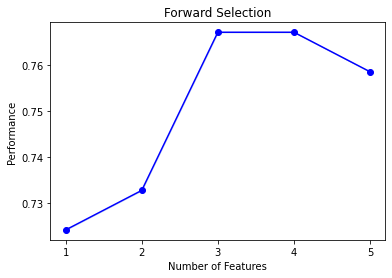

In [ ]:
# ---- Example  of foward ---- #
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the data
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Notes/Python/Health.csv")
X = health.iloc[:,:-1].values
y = health.iloc[:,-1].values

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(
  lr, # the model
  k_features = 5, # number of features
  forward = True, # selecting is done by forward selection
  floating = False,
  scoring = 'accuracy', # evulation meteric for selection process
  cv = 0 # does k-fold crass validation
)
# Fit the equential forward selection model
sfs.fit(X,y)
# Printing out the best result for the 3 features that were selected
print(sfs.subsets_[5]["feature_names"])
# Getting the accuracy of the model with those 3 features
print(sfs.subsets_[5]["avg_score"])
# Now we can print the overall accuracy of the model
plot_sfs(sfs.get_metric_dict())
# showing the plot
plt.title("Forward Selection")
plt.show()

('0', '1', '2', '3', '7')
0.7931034482758621


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


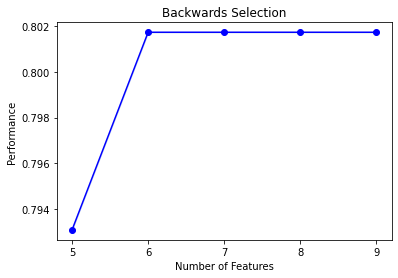

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Load the data
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Notes/Python/Health.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]
X = X.values
y= y.values
# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential backward selection
sbs = SFS(lr,
          k_features=5,
          forward=False,
          floating=False,
          scoring='accuracy',
          cv=0)
sbs.fit(X, y)

print(sbs.subsets_[5]["feature_names"])
# Getting the accuracy of the model with those 3 features
print(sbs.subsets_[5]["avg_score"])
# Now we can print the overall accuracy of the model
plot_sfs(sbs.get_metric_dict())
# showing the plot
plt.title("Backwards Selection")
plt.show()


# Recursive Feature Elimination

This approach is similar to how backwards selection works, but instead of testing out a large subset of different feature combonations, this only checks one. This means its a lot faster, but less through in its selection process of features.A great way to think about the differnce is imagine that you have a set of 7 features, and you really needed to reduce that number down to 5. If you were to use the recursive method, you would only look at 2 subsets of features before your done.Where as with backwards selection, you would iterate through 11 subsets. So if speed is of importance, recursion is a quick way to get up and running

In [ ]:
# --- Using the same set of data --- #
# Recursive feature selection
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the data
health = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Notes/Python/Health.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Create a list of feature names
feature_list = list(X.columns)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(estimator=lr, n_features_to_select=3)
rfe.fit(X, y)

# List of features chosen by recursive feature elimination
rfe_features  = [f for (f, support) in zip(feature_list, rfe.support_) if support]
print(rfe_features)
# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.score(X,y))

['BMI', 'Glucose', 'Resistin']
0.7327586206896551


# Praticle Project implementation -- Wrapper Methods

This section shows how wrapper methods can be implemented on a pratical level. The task is to classify the respondents as either obese or not based on the response to a questionar. Since it is a classification task, logical regression, ensamble methods, and GaussianNB.

This is the features we are looking at [here](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+#) and the values have been transformed already.




The data set `obesity` contains 18 predictor variables. Here's a brief description of them.

* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0`.

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not.


In [ ]:
# Libraries needed for this project
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold, cross_validate


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


The first step is to load in the data set and get an idea of what it looks like

In [ ]:
# reading in the data
response = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Notes/Python/response.csv")
# looking at the dataframe
response.head()
# check for missing data
for columns in response.columns.values:
    # checks the data in each column and returns a count array of N/A values in each column
    array = response[columns].isna().value_counts() 
    # False means they arent blank
    print(array)

False    2111
Name: Gender, dtype: int64
False    2111
Name: Age, dtype: int64
False    2111
Name: family_history_with_overweight, dtype: int64
False    2111
Name: FAVC, dtype: int64
False    2111
Name: FCVC, dtype: int64
False    2111
Name: NCP, dtype: int64
False    2111
Name: CAEC, dtype: int64
False    2111
Name: SMOKE, dtype: int64
False    2111
Name: CH2O, dtype: int64
False    2111
Name: SCC, dtype: int64
False    2111
Name: FAF, dtype: int64
False    2111
Name: TUE, dtype: int64
False    2111
Name: CALC, dtype: int64
False    2111
Name: Automobile, dtype: int64
False    2111
Name: Bike, dtype: int64
False    2111
Name: Motorbike, dtype: int64
False    2111
Name: Public_Transportation, dtype: int64
False    2111
Name: Walking, dtype: int64
False    2111
Name: NObeyesdad, dtype: int64


In [ ]:
# splitting the data into response and feature datasets
X, y = response.iloc[:,:-1], response.iloc[:,-1]

Now we need to set up our classifiers. This is done in an array so that we can use the pipeline method from scikit learn to retyping code.



In [ ]:
# Declaring the state
state = 69

# Declaring the types of classifiers to use
classifiers = [
               LogisticRegression(max_iter=1000, solver='saga', random_state=state),
               RandomForestClassifier(min_samples_split=5, random_state=state),
               AdaBoostClassifier(DecisionTreeClassifier(random_state=state), random_state=state),
               GradientBoostingClassifier(learning_rate=.007, random_state=state),
               GaussianNB(var_smoothing=.01)
]

# Scaling the values
transformer = StandardScaler()

# Cross validation
kfold = StratifiedKFold(n_splits = 5)

# SFFS
sffs = SFS(
    estimator = classifiers[0], # Lr
    k_features = (5,10),
    forward = True,
    floating = True,
    cv = 0
)

# SBFS
sbfs = SFS(
    classifiers[0],
    k_features = (5,10),
    forward = False,
    floating = True,
    cv = 0
)


In [ ]:
nonsfs_pipelines = [Pipeline([('scalar', transformer), ("estimator", classifier)]) for classifier in classifiers]
sffs_pipline = [Pipeline([('scalar', transformer), ("SFFS", sffs), ("estimator", classifier)]) for classifier in classifiers]
sbfs_pipline = [Pipeline([('scalar', transformer), ("SBFS", sbfs), ("estimator", classifier)]) for classifier in classifiers]

In [ ]:
S

Writing a funcition to handle the pipeline and testing of the models

In [ ]:
# Setting up the cross validation
def models_fit(pipelines, X, Y, metrics):
    results = []
    # this fits the data to the estimators and returns the scoring of the models
    for pipes in pipelines:
        scores = cross_validate(pipes, X, Y, cv=kfold, scoring=metrics, return_train_score=True)
        train_acc = scores['train_acc'].mean()*100
        test_accuracy = scores['test_acc'].mean() * 100
        test_std = scores['test_acc'].std() * 100
        test_precision = scores['test_precision'].mean() * 100
        test_recall = scores['test_recall'].mean() * 100
        results.append([train_acc, test_accuracy, test_std,test_precision, test_recall])
    return np.array(results)


Fitting the models to the data

In [ ]:
# Defining the scoring metrics we used
scoring = {'acc': 'accuracy',
           'precision': 'precision_macro',
           'recall': 'recall_macro'}
# Defining the model we used
classifiers_names = ['Logistic Regression',
                     'Random Forest Classifier',
                     'AdaBoost Classifier',
                     'Gradient Boosting Classifier',
                     'Gaussian Naive Bayes'
                     ]
# Fitting the models to the data
results_non_sfs = models_fit(nonsfs_pipelines, X, y, scoring)
results_sffs = models_fit(sffs_pipline, X, y, scoring) # Run Time ~ 5min
results_sbfs = models_fit(sbfs_pipline, X, y, scoring) # Run Time ~ 21 min


STOPPING EARLY DUE TO KEYBOARD INTERRUPT.../usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
KeyError: None

  FitFailedWarning)


In [ ]:
# Non SFS DataFrame
# Creating a dataframe for our model
non_sfs_df = pd.DataFrame({
    "Models": classifiers_names,
    "Train Accuracy": results_non_sfs[:, 0],
    "Test Accuracy": results_non_sfs[:, 1],
    "Test Std": results_non_sfs[:, 2],
    "Test Percision": results_non_sfs[:, 3],
    "Test Recall": results_non_sfs[:, 4]
})

In [ ]:
# SFFS
sffs_df = pd.DataFrame({
    "Models": classifiers_names,
    "Train Accuracy": results_sffs[:, 0],
    "Test Accuracy": results_sffs[:, 1],
    "Test Std": results_sffs[:, 2],
    "Test Percision": results_sffs[:, 3],
    "Test Recall": results_sffs[:, 4]
})

In [ ]:
# SBFS
sbfs_df = pd.DataFrame({
    "Models": classifiers_names,
    "Train Accuracy": results_sbfs[:, 0],
    "Test Accuracy": results_sbfs[:, 1],
    "Test Std": results_sbfs[:, 2],
    "Test Percision": results_sbfs[:, 3],
    "Test Recall": results_sbfs[:, 4]
})

# Preformaces!
Graphs below demonistrate the preformace without and with SF

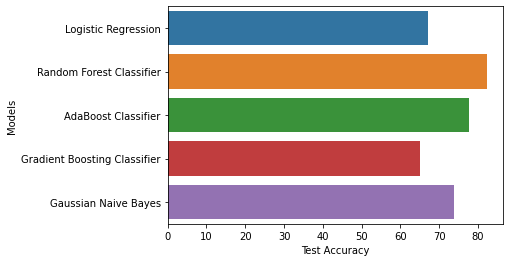

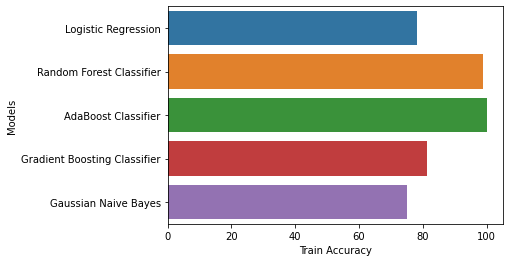

In [ ]:
sns.barplot(data=non_sfs_df, x= "Test Accuracy", y = "Models",orient='h')
plt.show()
sns.barplot(data=non_sfs_df, x= "Train Accuracy", y = "Models",orient='h')

Adding SFS into our model pipeline


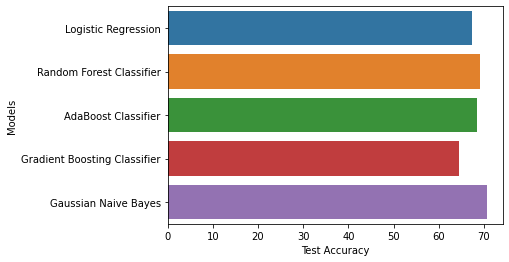

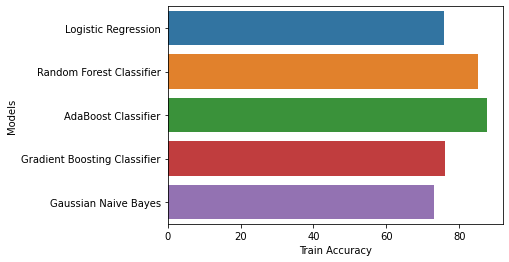

In [ ]:
sns.barplot(data=sffs_df, x= "Test Accuracy", y = "Models",orient='h')
plt.show()
sns.barplot(data=sffs_df, x= "Train Accuracy", y = "Models",orient='h')
plt.show()

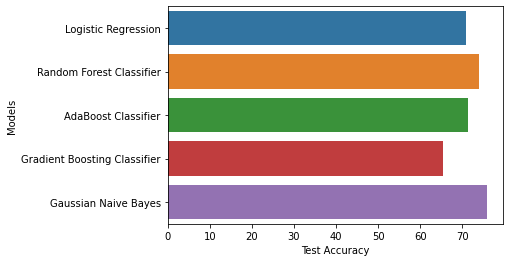

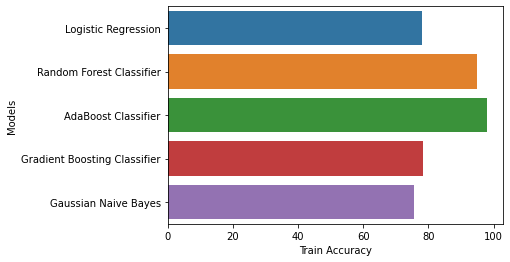

In [ ]:
sns.barplot(data=sbfs_df, x= "Test Accuracy", y = "Models",orient='h')
plt.show()
sns.barplot(data=sbfs_df, x= "Train Accuracy", y = "Models",orient='h')

# Regularization
## GridSearch and LogisticCV Example

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


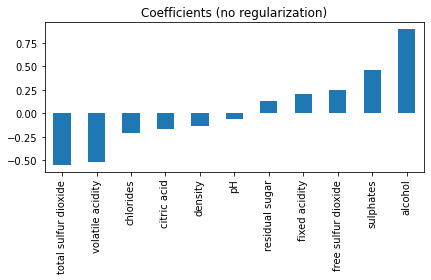

0.7727598566308242
0.7266666666666667
Ridge-regularized Training Score 0.7727598566308242
Ridge-regularized Testing Score 0.7266666666666667


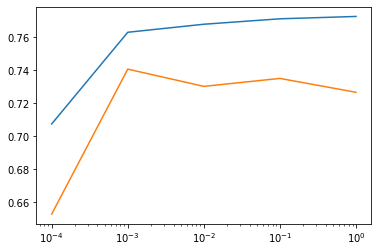

{'C': 0.0019630406500402726} 0.7723336222647887
Optimized 0.7693360711841205
Optimized 0.7407407407407408
[0.25950242] [[ 0.11605157 -0.55615081 -0.17233324  0.03124566 -0.17340965  0.2006826
  -0.50604519  0.         -0.07065103  0.43227053  0.94097651]]


<Figure size 432x288 with 0 Axes>

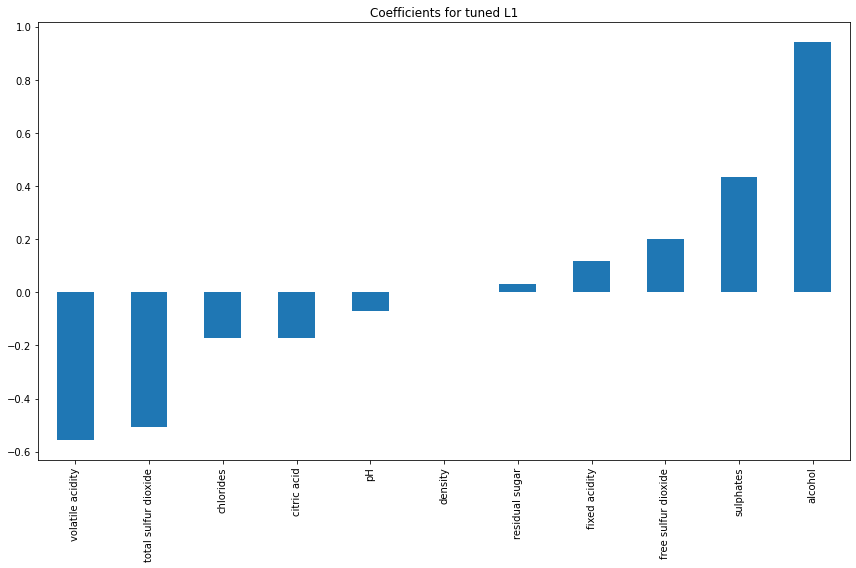

<Figure size 432x288 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/wine_quality.csv')
print(df.columns)
y = df['quality']
features = df.drop(columns = ['quality'])


## 1. Data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

## 2. Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_features, y, test_size = .2, random_state = 99)

## 3. Fit a logistic regression classifier without regularization
from sklearn.linear_model import LogisticRegression
clf_no_reg = LogisticRegression(penalty = 'none')
clf_no_reg.fit(x_train, y_train)

## 4. Plot the coefficients
predictors = features.columns
coefficients = clf_no_reg.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
coef.plot(kind='bar', title = 'Coefficients (no regularization)')
plt.tight_layout()
plt.show()
plt.clf()

## 5. Training and test performance
from sklearn.metrics import f1_score
y_pred_train = clf_no_reg.predict(x_train)
y_pred_test = clf_no_reg.predict(x_test)
print(f1_score(y_pred_train, y_train))
print(f1_score(y_pred_test, y_test))
## 6. Default Implementation (L2-regularized!)
clf_default = LogisticRegression() 
clf_default.fit(x_train, y_train)
## 7. Ridge Scores
y_pred_train = clf_default.predict(x_train)
y_pred_test = clf_default.predict(x_test)
 
print('Ridge-regularized Training Score', f1_score(y_train, y_pred_train))
print('Ridge-regularized Testing Score', f1_score(y_test, y_pred_test))

## 8. Coarse-grained hyperparameter tuning
training_array = []
test_array = []
# Repersents the regulazation value, smaller = more
C_array = [0.0001, 0.001, 0.01, 0.1, 1]

for x in C_array:
  clf = LogisticRegression(C = x)
  clf.fit(x_train, y_train)
  y_pred_train = clf.predict(x_train)
  y_pred_test = clf.predict(x_test)
  training_array.append(f1_score(y_train, y_pred_train))
  test_array.append(f1_score(y_test, y_pred_test))
## 9. Plot training and test scores as a function of C
plt.plot(C_array,training_array)
plt.plot(C_array,test_array)
plt.xscale('log')
plt.show()
plt.clf()

## 10. Making a parameter grid for GridSearchCV
C_array = np.logspace(-4, -2, 100)
tuning_c = {"C":C_array}

## 11. Implementing GridSearchCV with l2 penalty
from sklearn.model_selection import GridSearchCV
clf_gs = LogisticRegression()
GSM = GridSearchCV(clf_gs, param_grid = tuning_c, scoring = 'f1', cv = 5)
GSM.fit(x_train, y_train)

## 12. Optimal C value and the score corresponding to it
best_params = GSM.best_params_
best_score = GSM.best_score_

print(best_params, best_score)

## 13. Validating the "best classifier"
clf_best_ridge = LogisticRegression(C = best_params["C"])
clf_best_ridge.fit(x_train, y_train)
y_pred_train = clf_best_ridge.predict(x_train)
y_pred_test = clf_best_ridge.predict(x_test)
print('Optimized', f1_score(y_train, y_pred_train))
print('Optimized', f1_score(y_test, y_pred_test))

## 14. Implement L1 hyperparameter tuning with LogisticRegressionCV
from sklearn.linear_model import LogisticRegressionCV
C_array = np.logspace(-2,2,100)
RegCV = LogisticRegressionCV(Cs = C_array, cv = 5, penalty = "l1", solver = 'liblinear', scoring = 'f1')
RegCV.fit(scaled_features, y)

## 15. Optimal C value and corresponding coefficients
Opti_C = RegCV.C_ 
Coefficents = RegCV.coef_
print(Opti_C, Coefficents)

## 16. Plotting the tuned L1 coefficients
coefficients = RegCV.coef_.ravel()
coef = pd.Series(coefficients,predictors).sort_values()
 
plt.figure(figsize = (12,8))
coef.plot(kind='bar', title = 'Coefficients for tuned L1')
plt.tight_layout()
plt.show()
plt.clf()


# Feature Importance

This section covers some techiniques that can be used to determine the importance of a feature. (Not including the use of correlation). The code in this section focuses on the use of Gini a decision tree method that rates groups and decision based on the homongy of that group.

Image you have a group of  cars you are trying to sell. You have narrowed it down to 2 factors. The color and the price. This is where the Gini comes in. Lets say that 6 of the 8 cars that were priced below 50k solid, but 8 of 8 cars that did sell were mint green. The Gini is a measure of purity of the group. So the Gini gain for price was lower than the gini gain of the color group. So at each step in the tree, the gini is evuluated based on how well that factor  seperates the groups.

This is super handy when you have a dataset that you know doesn't have a lot of multicorrelated factors / duplicated factors. Below is an example of the brest cancer dataset and how to implement a GINI decision tree.


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets 
 
 # Load in the dataset and split into a training and testing split
dataset = datasets.load_breast_cancer()
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

The next step is to build the model:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
 # by declaring it the gini then it is using the purity of the group as the split measure
clf = DecisionTreeClassifier(criterion='gini')
 
# Fit the decision tree classifer
clf = clf.fit(X_train, y_train)

Now we can visiualize the results

[0.00505698 0.02298627 0.         0.         0.01655012 0.
 0.00232725 0.         0.         0.00758547 0.         0.03754395
 0.         0.00477673 0.         0.         0.         0.
 0.         0.00132172 0.70189316 0.03643982 0.00758547 0.01769943
 0.00973884 0.         0.00337362 0.12512115 0.         0.        ]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


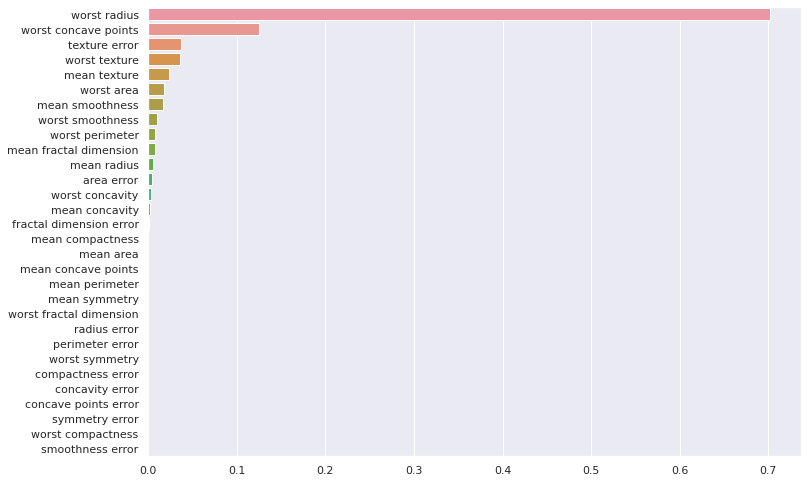

In [ ]:
import seaborn as sns
# Print the feature importances
feature_importances = clf.feature_importances_
print(feature_importances)
# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = dataset.feature_names[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
 
# Create a bar plot of the feature importances
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(sorted_importances, sorted_feature_names)

## Things to keep in mind when doing feature importance!

The first is that gini tends to favor numerical featueres over catagorical, which could be somewhat problematic if the data isn't transformed and scaled before hand. This algorithm is also insentive to complex relationships and can often miss our on mutlicorrelative relationships. But this method is relatively easy and can give you a better insight on to the possible methods that you can apply to the dataset.

There is other verisons of this feature selection that are of mention:

- Aggregate methods a.k.a random forest, this is similar to doing cross validation where it runs through a bunch of potential decision trees and selects the best. Its main downside being that you have to refit the model a bunch making it computationally expensive
-  Premutation based methods -- removing features at random to see what sort of impact they have on the overall model score.
- coefficents - this can be applied if the data is scaled then you can look at the values for regressions of classifications

# Dimensionality Reduction

The focus of this section is on how to address high dimensionality and the issues that can be caused by it.

The two main issues are *data sparisty* and *distance concentration* 

## **Data Sparisty**

This is the concept that the amount of examples needed to properally generalize, you need to have examples of all possible outcomes within the dataset, this leads to a magnitudial increase in the amount of examples needed to properally generalize a model to the data.

## **Distance Concentration**

This is the concept that as features increase, the amount of noise also increases. So the ability to tell datapoints apart for each other also decreases. This is due to the fact that the literal differences between them can actually decrease with more measures.


## Important Notes
There is a few methods that can be used to address these issues, PCA or Principal Componet Analysis and LDA or Linear discriminat analysis  which are covered below. There is also t-SNE which is a t-distributed stochastic neighbor embedding which does two stages of grouping objects, the first by creating a probablity distrubition where it trys to group like things and seperate out the dataset. It then reduces the subsets into lower dimensions and calculates the distance between the objects. It uses a t-test to do this






##PCA

The first example is using numpy to implement PCA, this starts with taking a correlation matrix of the data and using this to build out the eigenvalues. The eignevalues are a discription of the variance that each feature is responsible for. The vectors describe the rotation of the feature (its axis) for relating the variance to the orginal features.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_matrix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/data_matrix.csv')

# 1. Use the `.corr()` method on `data_matrix` to get the correlation matrix 
correlation_matrix = data_matrix.corr()

## Heatmap code:
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin = -1, vmax = 1, cmap=red_blue)
plt.show()

# 2. Perform eigendecomposition using `np.linalg.eig` 
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# 3. Print out the eigenvectors and eigenvalues
print('eigenvectors: ')
print(eigenvectors)

print('eigenvalues: ')
print(eigenvalues)



Now that we have computed the values, we can use a scree plot to get an idea of each principal componet in the dataset. The plot itself describes the proportion of information each componet is responsible for. This can be done by taking componets individual value and dividing it by the total of all componets.




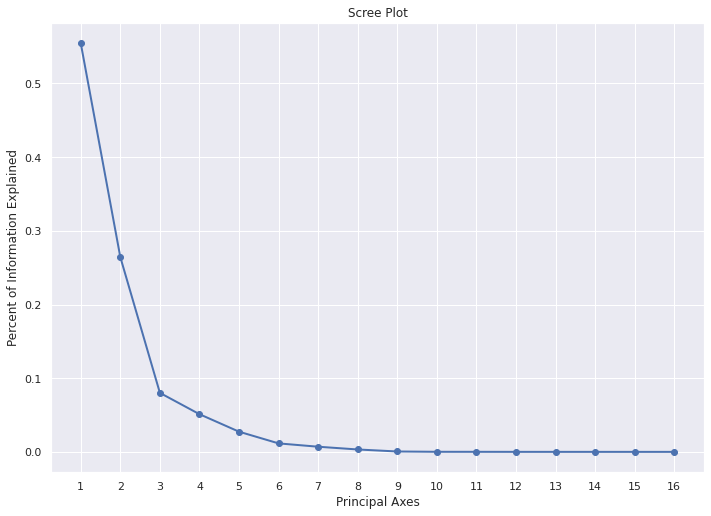

In [ ]:
info_prop = eigenvalues/ eigenvalues.sum()

## Plot the principal axes vs the information proportions for each principal axis

plt.plot(np.arange(1,len(info_prop)+1),info_prop, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Percent of Information Explained')
plt.show()


You can also look at the cummulative sum which will give you good understanding of the features that you need in order to explain the patterns in the data. This is done by taking the rolling sum of the proportions and comparing it to a threshold value.

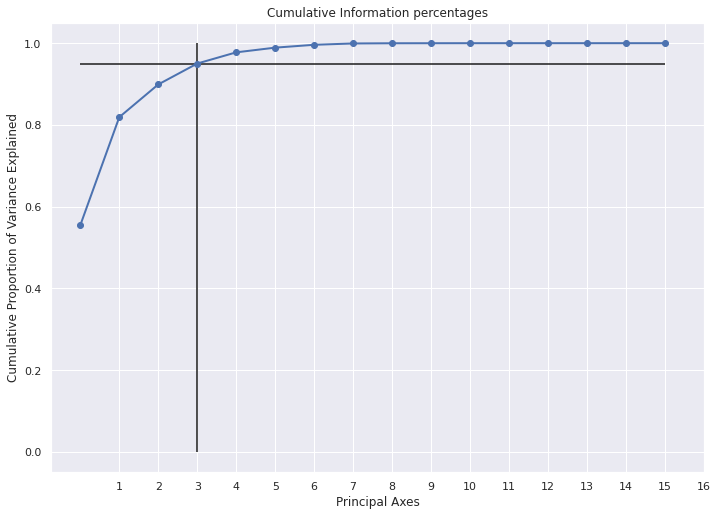

In [ ]:
cum_info_prop = np.cumsum(info_prop)

## Plot the cumulative proportions array

plt.plot(cum_info_prop, 'bo-', linewidth=2)
plt.hlines(y=.95, xmin=0, xmax=15)
plt.vlines(x=3, ymin=0, ymax=1)
plt.title('Cumulative Information percentages')
plt.xlabel('Principal Axes')
plt.xticks(np.arange(1,len(info_prop)+1))
plt.ylabel('Cumulative Proportion of Variance Explained')
plt.show()

This sort of analysis can also be done in with scikit-learn for a more automated approach

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

data_matrix = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/data_matrix.csv')

# 1. Standardize the data matrix
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix-mean) / sttd
print(data_matrix_standardized.head())

# 2. Find the principal components
pca = PCA()
components = pca.fit(data_matrix_standardized).components_
components = pd.DataFrame(components).transpose()
components.index =  data_matrix.columns
print(components)

# 3. Calculate the variance/info ratios
var_ratio = pca.explained_variance_ratio_
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

       Area  Perimeter  ...  ShapeFactor3  ShapeFactor4
0 -0.840718  -1.143277  ...      1.925653      0.838340
1 -0.829157  -1.013887  ...      2.689603      0.771110
2 -0.807128  -1.078789  ...      1.841288      0.916721
3 -0.785712  -0.977179  ...      2.204169     -0.197978
4 -0.781210  -1.097344  ...      3.013352      0.939605

[5 rows x 16 columns]
                       0         1         2   ...        13        14        15
Area             0.282458  0.245882 -0.061447  ... -0.655728  0.133190  0.231436
Perimeter        0.310891  0.179303 -0.018853  ... -0.081390  0.012658  0.014614
MajorAxisLength  0.325824  0.100757 -0.084692  ...  0.186251  0.174432  0.346019
MinorAxisLength  0.236199  0.343461  0.007500  ...  0.183096  0.155445  0.331749
AspectRation     0.229298 -0.330844 -0.169058  ... -0.026666  0.102810 -0.123576
Eccentricity     0.231526 -0.319434 -0.163042  ... -0.000046 -0.042306  0.014793
ConvexArea       0.283200  0.244630 -0.053649  ...  0.648622 -0.130974 -0.

Now we can graph these componets and look at how it clusters the classes that we are interest in:

        PC1       PC2       PC3       PC4
0 -4.981378  1.824630  0.748993 -0.390797
1 -5.436593  2.932257  2.182294 -0.431944
2 -4.757913  1.826817  0.514019 -0.125849
3 -4.300383  2.003587  3.554316  0.082961
4 -6.349107  4.088055  1.179156 -0.830327


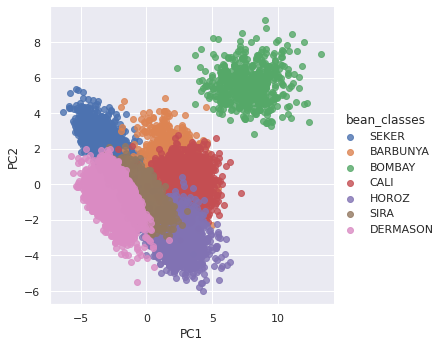

In [ ]:
classes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/classes.csv')

# 1. Transform the data into 4 new features using the first PCs
pca = PCA(n_components = 4)
data_pcomp = pca.fit_transform(data_matrix_standardized)
data_pcomp = pd.DataFrame(data_pcomp)
data_pcomp.columns = ['PC1', 'PC2', 'PC3', 'PC4']
print(data_pcomp.head())

## 2. Plot the first two principal components colored by the bean classes

data_pcomp['bean_classes'] = classes
sns.lmplot(x='PC1', y='PC2', data=data_pcomp, hue='bean_classes', fit_reg=False)
plt.show()

## Looking at PCA in practice

The main advantages to PCA is that it can greatly reduce the amount of features we need for the model to make an accurate prediciton. 

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
 
# We will use the classes as y
y = classes.Class.astype('category').cat.codes
 
# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=6) 
X = pca_1.fit_transform(data_matrix_standardized) 
 
# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-4, max_iter=1000)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')
 
# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0, tol=1e-4)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Score for model with 4 PCA features: 0.9013802315227071
Score for model with original features: 0.9171861086375779


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# Visualization of how PCA reduces features

This is a PCA on an image dataset. It will show how we can reduce the number of features while not lossing the detail in the dataset.

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
 
 
# Download the data from sklearn's datasets
faces = datasets.fetch_olivetti_faces()['data']
 
# 1. Standardize the images using the mean and standard deviation
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std
 
 
# 2. Find the side length of a square image
n_images, n_features = faces_standardized.shape
n_images_normal, n_features_normal = faces.shape
side_length = int(np.sqrt(n_features))
side_length_normal = int(np.sqrt(n_features_normal))
print(f'Number of features(pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')
 
 

fig = plt.figure(figsize=(10, 8))
 
# Observe the first 15 images.
for i in range(15):
 
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Face: #{i}')
 
    # Get an image from a row based on the current value of i
    face_image = faces_standardized[i]
 
    # Reshape this image into side_length x side_length 
    face_image_reshaped = face_image.reshape(side_length, side_length)

    # Show the image
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)
plt.show()

# Create an empty 10x8 plot
fig = plt.figure(figsize=(10, 8))
 
# Second loop of orginal images
for i in range(15):
 
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Image of Original Face: #{i}')
 
    # Get an image from a row based on the current value of i
    normal_face = faces[i]
 
    # Reshape this image into side_length x side_length 
    face_image_normal = normal_face.reshape(side_length_normal, side_length_normal)
    # Show the image
    ax.imshow(face_image_normal, cmap=plt.cm.bone)

plt.show()

# The next step is to do the PCA on the faces
import pandas as pd
from sklearn.decomposition import PCA

# 1. Instantiate a PCA object and fit the standardized faces dataset
pca = PCA(n_components=400) # .9% of the original data 
pca.fit(faces_standardized)

# 2. Retrieve and plot eigenvectors (eigenfaces)
eigenfaces = pca.components_ 

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    # Create subplot, remove x and y ticks, and add title
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface: #{i}')
    
    # Get an eigenvector from the current value of i
    eigenface = eigenfaces[i]

    # Reshape this image into 64x64 since the flattened shape was 4096
    eigenface_reshaped = eigenface.reshape(64, 64)

    # Show the image
    ax.imshow(eigenface_reshaped, cmap=plt.cm.bone)
plt.show()

# 3. Reconstruct images from the compressed principal components
# The principal components are usually calculated using `faces_standardized @ principal_axes` or the `.transform` method
principal_components = pca.transform(faces_standardized) 

# The `inverse_transform` method allows for reconstruction of images in the original size
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the reconstructed images 
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed: {i}')

    reconstructed_face = faces_reconstructed[i]
    reconstructed_face_reshaped = reconstructed_face.reshape(64, 64)
    ax.imshow(reconstructed_face_reshaped, cmap=plt.cm.bone)
plt.show()

# PCA - Project

This project will demonstrate the implementation of PCA on a dataset. 

The objective is to  classify particles into gamma(signal) or hadrons(background). Given that the features are correlated, a PCA is needed to get a new set of features, and select the features that contain the most information. The data set was generated by a Monte Carlo program, Corsika, described in D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers, Forschungszentrum Karlsruhe FZKA 6019 (1998).

## Part 1

The focus of this section is to understand and prepare the data for the PCA analysis

In [ ]:
# import the necessary libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1. Load the data
tele_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/telescope_data.csv', index_col=0)

# Step 2. Clean, and seperate
print(tele_data.head())
print(tele_data.describe())

for columns in tele_data.columns:
    print(tele_data[columns].isna().value_counts())

# There is no N/A values

# Seperate out the data (features and data points)
classes = tele_data.iloc[:,-1]
x = tele_data.drop(columns = 'class')

    fLength    fWidth   fSize   fConc  ...  fM3Trans   fAlpha     fDist  class
0   28.7967   16.0021  2.6449  0.3918  ...   -8.2027  40.0920   81.8828      g
1   31.6036   11.7235  2.5185  0.5303  ...   -9.9574   6.3609  205.2610      g
2  162.0520  136.0310  4.0612  0.0374  ...  -45.2160  76.9600  256.7880      g
3   23.8172    9.5728  2.3385  0.6147  ...   -7.1513  10.4490  116.7370      g
4   75.1362   30.9205  3.1611  0.3168  ...   21.8393   4.6480  356.4620      g

[5 rows x 11 columns]
            fLength        fWidth  ...        fAlpha         fDist
count  19020.000000  19020.000000  ...  19020.000000  19020.000000
mean      53.250154     22.180966  ...     27.645707    193.818026
std       42.364855     18.346056  ...     26.103621     74.731787
min        4.283500      0.000000  ...      0.000000      1.282600
25%       24.336000     11.863800  ...      5.547925    142.492250
50%       37.147700     17.139900  ...     17.679500    191.851450
75%       70.122175     24.739475 

With the data prepped, we can now start to look at the data, and preform some prelim analysis

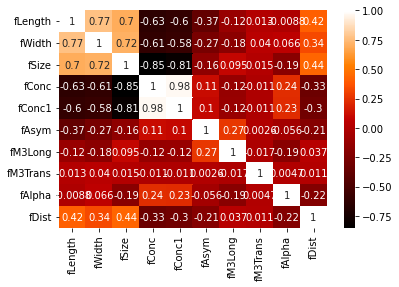

In [ ]:
# Step 3. Generate a coor plot
corr_matrix = x.corr()
# plot the matrix
sns.heatmap(corr_matrix, cmap ="gist_heat", annot=True)
plt.show()

So the main reason that we are doing this is that PCA has an advantage in that it doesn't really care about the fact that values are heavily coorelated with each other. We can see that the two concentration values are high correlated with a majority of the data. This is also true of the distance values. So the next thing to do is to prep the data. This involves getting the eigenvalues and eigenvectors, that is, the characteristic values and vectors of the dataset. Which is a linear trasfromation of the data based on the variance of datasets correlates.

In [ ]:
# Step 4. Preform eigendecomposition

# Get the eiigenvalues and vectors
values, vectors = np.linalg.eig(corr_matrix)
print(f'Eigenvalues length: {values.size}, vs the orginal number of features: {x.shape[1]}')

# Ordering the values so that its readable
indices = values.argsort()[::-1]
sorted_values = values[indices]
sorted_vectors = vectors[:, indices]

# examing the shape of both the vectors and values
print(f'Value shape: {values.shape} and the vector shape: {vectors.shape}')
print(sorted_values)

Eigenvalues length: 10, vs the orginal number of features: 10
Value shape: (10,) and the vector shape: (10, 10)
[4.2239909  1.5751879  1.01180532 0.9940127  0.74201939 0.65008647
 0.4075386  0.22036243 0.15475338 0.02024291]


We now have our eigenvalues and vectors sorted. The next step is to get an idea of what each vector is holding in terms of information about the dataset. This is done by taking the individual values of each value and dividing it by the sum of its parts.

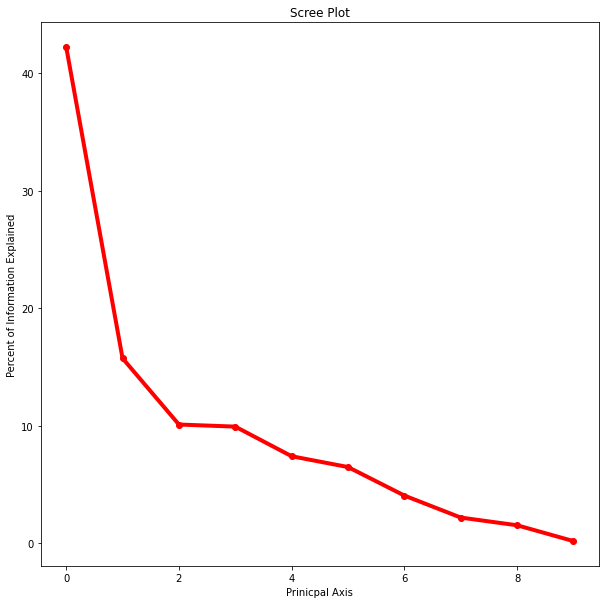

In [ ]:
# Step 6.
# getting the proportions of the data
info_proportion = sorted_values / sorted_values.sum()
info_precentages = info_proportion * 100

# Plot the values to understand what vectors are contributing
plt.figure(figsize = (10,10))
plt.plot(info_precentages, "ro-", linewidth = 4)
plt.title("Scree Plot")
plt.xlabel("Prinicpal Axis")
plt.ylabel("Percent of Information Explained")
plt.show()

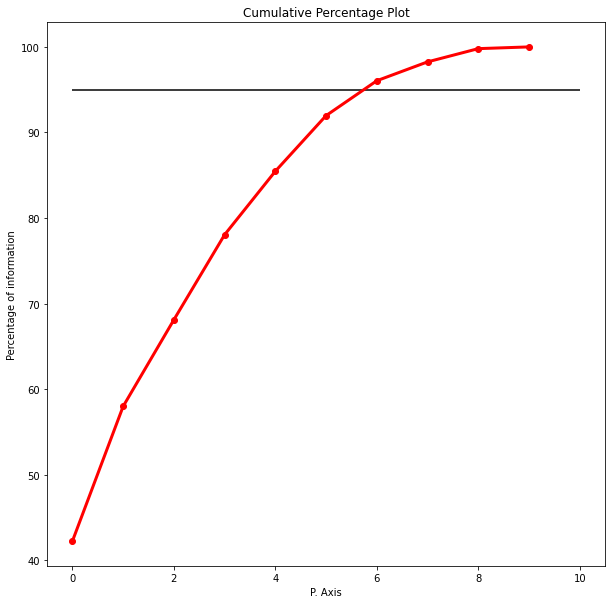

In [ ]:
# Step 7. Cummalative percentage plot

# getting the cummalative total of the percentages
cumulative = np.cumsum(info_precentages)

# plot the cummaltive totals
plt.figure(figsize=(10,10))
plt.plot(cumulative,'ro-', linewidth= 3 )
plt.hlines(y=95, xmin = 0, xmax=10)
plt.title("Cumulative Percentage Plot")
plt.xlabel("P. Axis")
plt.ylabel("Percentage of information")
plt.show()


## Part 2
It looks like we will need to use at least 6 of the 10 members to encapsulate our data. This is still a darn good reduction though (40%). The next step is to start the PCA. This means that the data needs to be transformed and standardized. 

In [ ]:
# import them libs bb
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# make sure to load in the data (can do this a couple of ways)
Tele_values = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/telescope_data.csv', index_col=0).drop(columns = "class")
Tele_classes = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/telescope_data.csv', index_col=0).iloc[:,-1]

# Step 1. Standardize the matrix
mean = Tele_values.mean(0)
sttd = Tele_values.std(0)

# produce standard matrix
Tele_Standard = (Tele_values - mean) / sttd

# Step 2. Creat pca model and fit that shit
pca = PCA()

# Fitting 
principal_comp = pca.fit_transform(Tele_Standard)
print(f'Number of features in data set: {Tele_values.shape[1]}')
print(f'Number of features in the principal components: {principal_comp.shape[1]} ')

Number of features in data set: 10
Number of features in the principal components: 10 


This next little section shows how to get the same eigenvalues that we produced above from the PCA object that was just created.This is due to the fact that the pca class has built in methods to access this data

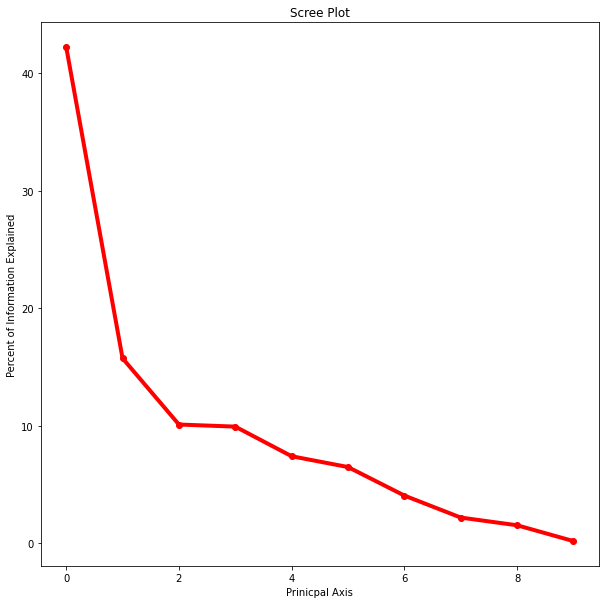

In [ ]:
# Step 3. Getting the eigenvalues and eigenvectors
singular_value = pca.singular_values_
eigenvalues_pca = singular_value ** 2

# Getting the vectors (The .T transposes the rows into columns)
eigenvectors_pca = pca.components_.T

# Step 4. Get the variance ratios
principal_axis_ratio = pca.explained_variance_ratio_
principal_axis_percent = principal_axis_ratio * 100

# Step 5. Generate a scree plot!
plt.figure(figsize = (10,10))
plt.plot(principal_axis_percent, "ro-", linewidth = 4)
plt.title("Scree Plot")
plt.xlabel("Prinicpal Axis")
plt.ylabel("Percent of Information Explained")
plt.show()

Awesome! They look the same as the original scree plot, just made a lot easier with the built in functions of the PCA class. The next step is to mess around with the number of features.

Number of features in data set: 10
Number of features in the principal components: 4 


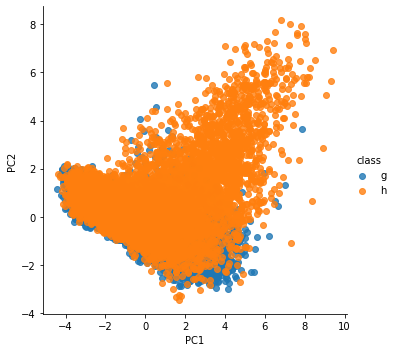

In [ ]:
# Step 6. Making a PCA model with 2 components
small_pca = PCA(n_components=4)

# Fitting the data
small_prin_comp = small_pca.fit_transform(Tele_Standard)

# Showing off the feature reduction
print(f'Number of features in data set: {Tele_values.shape[1]}')
print(f'Number of features in the principal components: {small_prin_comp.shape[1]} ')

# Step 7. plotting the components
principal_components_data = pd.DataFrame({
     'PC1':small_prin_comp[:, 0],
     'PC2': small_prin_comp[:, 1],
     'PC3': small_prin_comp[:, 2],
     'class': classes,
})

# Ploting it
sns.lmplot(x='PC1', y='PC2', data=principal_components_data, hue='class', fit_reg=False)
plt.show()

# encoding the classes for the fit
y = classes.astype('category').cat.codes

With a component model of our data we can used the reduced number of features to fit a model to the data.

In [ ]:
# Step 8. Reduce the data set
X = small_pca.fit_transform(Tele_Standard)

# Split the data up
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state = 69)

The final part of this project is to classify the data. Using the data that we reduced with PCA. This classification will be done with a Linear Support Vector Classifier but can be done with any binary classifier.

In [ ]:
# Step 9. Setting up the classifier
svc_1= LinearSVC(C= .01, random_state=0, tol=.0001)
svc_1.fit(x_train, y_train)

# Get that score
score_1_train = svc_1.score(x_train, y_train)
score_1_test = svc_1.score(x_test, y_test)

# printing it
print(f'The score for svc model with 4 PCA vectors is: {score_1_train}')
print(f'The score for svc model with 4 PCA vectors is: {score_1_test}')

The score for svc model with 4 PCA vectors is: 0.7620268138801262
The score for svc model with 4 PCA vectors is: 0.7681388012618297


We can then compare this score to just using two features without PCA

In [ ]:
# Step 10. Comparing preformace
# selecting the first two features
x_first_two  = Tele_Standard.iloc[:,0:4]

# Splitting up the data
x_train_, x_test_, y_train_, y_test_ = train_test_split(x_first_two, y, random_state = 69, test_size=.2)

# New classifier
svc_2 = LinearSVC(C= .01, random_state=0, tol=.0001)
svc_2.fit(x_train_, y_train_)

score_2_train = svc_2.score(x_train_, y_train_)
score_2_test = svc_2.score(x_test_, y_test_)

# printing out the score

print(f'The score for svc model with 2 features is: {score_2_train}')
print(f'The score for svc model with 2 features is: {score_2_test}')


The score for svc model with 2 features is: 0.735410094637224
The score for svc model with 2 features is: 0.7287066246056783


The SVC that was trained with the PCA compents, is always a little bit better than the raw features. This is due to the fact that the features have been captured better within PCA.

# LDA

Linear Discriminat Analysis or LDA is a method of dimension reduction similar to PCA but is more optimized for classification than for regression. In simple terms, it works by creating a subspace of independent variables to simplify the the amount of dimensions in the data

## How it works

LDA finds the best subspace given the type of classification problem. This means that if the problem is a binary outcome, it will try to maximize the variance between those two classes. It basically trys to group them like clustering where the two classes are far away from each other but the points within those classes are tightly grouped. The result of applying the LDA method to your dataset reduces the amount of dimensions in that dataset while providing almost the same predictive power. 

## When can you use it

The problem needs to be a classification one first and for most. Then there is a couple of assumptions that need to be met.

1. Only works if the number of examples of each class needs to be **GREATER** than the number of features in the data set

2. The data needs to be normally distrubited. I.E. the variables should not be heavly skewed

3. Homoscedasticity a.k.a. The size and shape of each class distrubition should look relatively the same. 

4. The variables shouldnt be multicoliner. I.E. they shouldn't have a strong relationship with other features in the dataset


## Example in Scikit-Learn


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
 
# Load data
seeds = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Notes/Python/telescope_data.csv', index_col=0)

#
X = seeds.iloc[:,:-1]
y = seeds['class']
 
# Scaling the data
scale = StandardScaler()
X_scaled = scale.fit_transform(X)

# Create LDA model
lda = LinearDiscriminantAnalysis(n_components=1)
 
# Fit the data and create a subspace X_new
X_new = lda.fit_transform(X_scaled, y)

# Import library
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
# Create logistic regression model
lr = LogisticRegression()
 
# Fit the model
lr.fit(X_new, y)
 
# Model accuracy
print(f'Score with one componet {lr.score(X_new, y)}')


# Create logistic regression model
lr_no_lda = LogisticRegression()

# Fit the model
lr_no_lda.fit(X_scaled, y)
 
# Model accuracy
print(lr_no_lda.score(X_scaled, y))

Score with one componet 0.7873817034700316
0.7911146161934806
